In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from atlas_topq_2019_23_Limits import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 20)

In [2]:
recastData = pd.read_pickle('./pp2tt_formFactors_scan.pcl')
recastDataEFT = pd.read_pickle('./pp2tt_eft_scan.pcl')

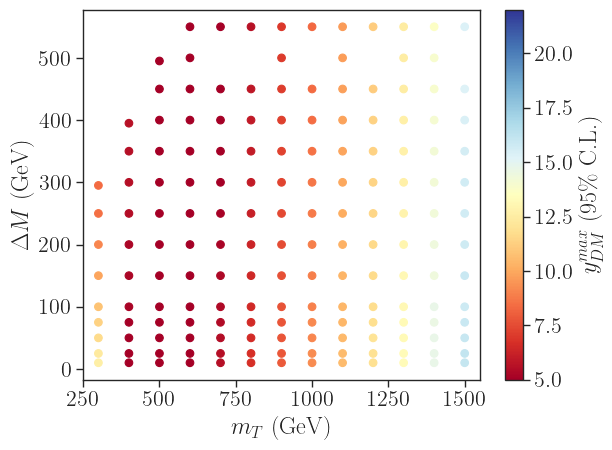

In [3]:
x = recastData['mST']
y = recastData['mChi']
dm = x-y
z = recastData['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
# plt.yscale('log')
plt.show()

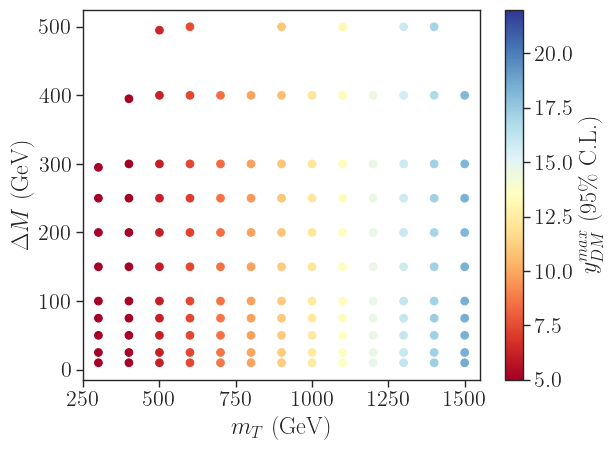

In [4]:
x = recastDataEFT['mST']
y = recastDataEFT['mChi']
dm = x-y
z = recastDataEFT['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30,vmin=5.,vmax=22.)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.xlim(250.,1550.)
# plt.yscale('log')
plt.show()

In [5]:
red = recastData[(recastData['mST'] == 600.) & (recastData['mChi'] == 590.)]
red.T

,46
model,Top-FormFactorsOneLoop-UFO
mST,600.0
mChi,590.0
mT,172.5
yDM,1.0
...,...
bin_836_2000,0.000015
bin_836_2000_Error,0.0
yDM (95% C.L.),4.678689
$\Delta \chi^2$ (95% C.L.),3.84


In [6]:
redEFT = recastDataEFT[(recastDataEFT['mST'] == 600.) & (recastDataEFT['mChi'] == 590.)]
redEFT.T

,40
model,Top-EFT-UFO
mST,600.0
mChi,590.0
mT,172.5
yDM,1.0
...,...
bin_836_2000,0.000024
bin_836_2000_Error,0.0
yDM (95% C.L.),7.373384
$\Delta \chi^2$ (95% C.L.),3.84


In [7]:
# ### Load CMS data
xsecsObs,sm,covMatrix = read_ATLASdata()
# ### Load LO background from MG5
smLO = getSMLO()
# Get k-factor for each bin
kfac = getKfactor(sm,smLO)

In [8]:
binCols = [c for c in red.columns 
               if 'bin_' in c.lower() and not 'error' in c.lower()]
bins_left = np.array([eval(c.split('_')[1]) for c in binCols])
bins_right = np.array([eval(c.split('_')[2]) for c in binCols])               

In [9]:
signal = list(zip(bins_left,red.iloc[0][binCols].values))
signal = np.array(sorted(signal))[:,1]

signalEFT = list(zip(bins_left,redEFT.iloc[0][binCols].values))
signalEFT = np.array(sorted(signalEFT))[:,1]


In [10]:
signal = kfac*signal
signalEFT = kfac*signalEFT

In [11]:
signal = signal/bin_widths
signalEFT = signalEFT/bin_widths
sm_bin = sm/bin_widths

In [12]:
resDict = getUL(signal,sm_bin,xsecsObs,covMatrix,deltas=0.0)
print(resDict)
resDictEFT = getUL(signalEFT,sm_bin,xsecsObs,covMatrix,deltas=0.0)
print(resDictEFT)

{'yDMmin': array([0.]), 'chi2min': 10.139227277087514, 'yDM95': 4.678689194950141, 'deltaChi95': 3.8399999999999945}
{'yDMmin': array([0.]), 'chi2min': 10.139227277087514, 'yDM95': 7.373383881462257, 'deltaChi95': 3.839999999999991}


In [13]:
resDict_exp = getUL(signal,sm_bin,sm_bin,covMatrix,deltas=0.0)
print(resDict_exp)
resDictEFT_exp = getUL(signalEFT,sm_bin,sm_bin,covMatrix,deltas=0.0)
print(resDictEFT_exp)

{'yDMmin': array([0.]), 'chi2min': 0.0, 'yDM95': 8.436843205567286, 'deltaChi95': 3.839999999999991}
{'yDMmin': array([0.]), 'chi2min': 0.0, 'yDM95': 11.50155582953871, 'deltaChi95': 3.840000000000007}


In [14]:
yDMvals = np.linspace(0.,15.,200)
deltas = 0.0
c2 = np.array([chi2(y, signal, sm_bin, xsecsObs, covMatrix, deltas) for y in yDMvals])
c2_exp = np.array([chi2(y, signal, sm_bin, sm_bin, covMatrix, deltas) for y in yDMvals])
c2EFT = np.array([chi2(y, signalEFT, sm_bin, xsecsObs, covMatrix, deltas) for y in yDMvals])
c2EFT_exp = np.array([chi2(y, signalEFT, sm_bin, sm_bin, covMatrix, deltas) for y in yDMvals])

In [15]:
c = sns.color_palette("Paired")

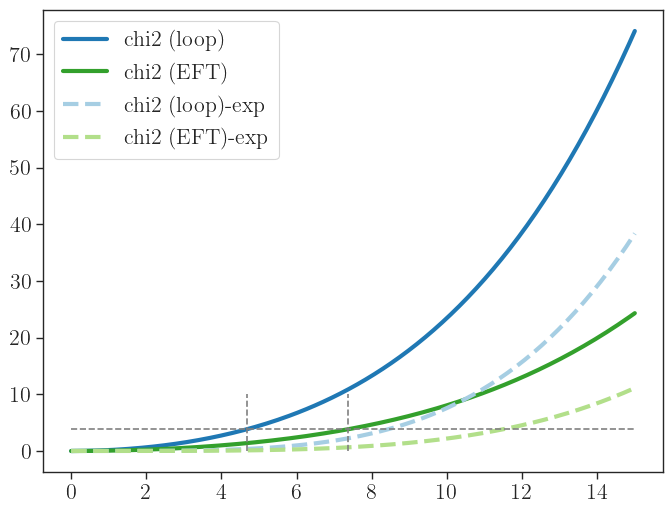

In [16]:
plt.figure(figsize=(8,6))
plt.plot(yDMvals,c2-resDict['chi2min'],label='chi2 (loop)',color=c[1],linewidth=3)
plt.plot(yDMvals,c2EFT-resDictEFT['chi2min'],label='chi2 (EFT)',color=c[3],linewidth=3)

plt.plot(yDMvals,c2_exp-resDict_exp['chi2min'],label='chi2 (loop)-exp',color=c[0],linestyle='dashed',linewidth=3)
plt.plot(yDMvals,c2EFT_exp-resDictEFT_exp['chi2min'],label='chi2 (EFT)-exp',color=c[2],linestyle='dashed',linewidth=3)


plt.hlines(y=3.84,xmin=yDMvals.min(),xmax=yDMvals.max(),linestyles='dashed',colors='gray')
plt.vlines(x=resDict['yDM95'],ymin=0,ymax=10.,linestyles='dashed',colors='gray')
plt.vlines(x=resDictEFT['yDM95'],ymin=0,ymax=10.,linestyles='dashed',colors='gray')
plt.legend()
# plt.ylim(0,100)
plt.show()

In [17]:
chi2(9.0, signal, sm_bin, xsecsObs, covMatrix, deltas=0.0)

27.97711305278599

In [18]:
i1,i2=0,len(signal)
c_old = chi2(9.0,signal[i1:i2],sm_bin[i1:i2],xsecsObs[i1:i2],covMatrix[i1:i2,i1:i2],deltas=0.0)
i1_old = i1
i2_old = i2
for i1 in range(0,6):
    c = chi2(9.0,signal[i1:i2],sm_bin[i1:i2],xsecsObs[i1:i2],covMatrix[i1:i2,i1:i2],deltas=0.0)
    print(r'chi2(%i-%i)-chi2(%i-%i) = ' %(i1_old,i2_old,i1,i2),c_old-c)
    c = c_old
    i1_old = i1
    i2_old = i2


chi2(0-8)-chi2(0-8) =  0.0
chi2(0-8)-chi2(1-8) =  0.5506842408093284
chi2(1-8)-chi2(2-8) =  1.5948567288518554
chi2(2-8)-chi2(3-8) =  5.360128960757361
chi2(3-8)-chi2(4-8) =  12.088476744701039
chi2(4-8)-chi2(5-8) =  20.106540393616825


In [19]:
i1,i2=0,-1
c_old = chi2(9.0,signal[i1:i2],sm_bin[i1:i2],xsecsObs[i1:i2],covMatrix[i1:i2,i1:i2],deltas=0.0)
i1_old = i1
i2_old = i2
for i2 in range(-1,-8,-1):
    c = chi2(9.0,signal[i1:i2],sm_bin[i1:i2],xsecsObs[i1:i2],covMatrix[i1:i2,i1:i2],deltas=0.0)
    print(r'chi2(%i-%i)-chi2(%i-%i) = ' %(i1_old,len(signal)+i2_old,i1,len(signal)+i2),c_old-c)
    c = c_old
    i1_old = i1
    i2_old = i2

chi2(0-7)-chi2(0-7) =  0.0
chi2(0-7)-chi2(0-6) =  3.0644212831468813
chi2(0-6)-chi2(0-5) =  7.240514692533047
chi2(0-5)-chi2(0-4) =  15.202168699448848
chi2(0-4)-chi2(0-3) =  21.81021436668758
chi2(0-3)-chi2(0-2) =  25.488082074573278
chi2(0-2)-chi2(0-1) =  26.508065850644353


In [20]:
chi2(0.0, signal, sm_bin, xsecsObs, covMatrix, deltas=0.0)

10.139227277087514

In [21]:
from scipy.stats import chi2

In [30]:
1-chi2.cdf(10.,df=8)

0.2650259152973615

In [27]:
1-chi2.cdf(4.0,df=8)

0.857123460498547

In [28]:
sum(xsecsObs*bin_widths)

1.2690770687119999

In [29]:
sum(sm_bin*bin_widths)

1.3354165515119103